# Salary Prediction Using Linear Regression:

## Simple Linear Regression: Salary vs Experience

## Objective
The objective of this project is to analyze the relationship between **Years of Experience** and **Salary** using **Simple Linear Regression**.  
This study aims to:
- Identify whether a linear correlation exists between experience and salary
- Build a best-fit regression line
- Understand how salary changes with an increase in experience

## Dataset
- **Independent Variable:** Years of Experience  
- **Dependent Variable:** Salary  

## Approach
The analysis includes data loading, exploratory data analysis, model training using linear regression, and visualization of the regression line to interpret results.


**Simple Linear Regression** is a type of Regression algorithms that models the relationship between a dependent variable and a single independent variable. The relationship shown by a Simple Linear Regression model is linear or a sloped straight line, hence it is called Simple Linear Regression.

#### Implementation of Simple Linear Regression
**Problem Statement**-
We are taking a dataset that has two variables: Salary (dependent variable) and Experience (Independent variable).

The goals of this problem is:

* We want to find out if there is any correlation between these two variables
* We will find the best fit line for the dataset.
* How the dependent variable is changing by changing the independent variable.

In [ ]:
#Importing Basics libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 1 : Data Loading:
A sample data has been gathered which contains Experience as an independent feature & Salaries based on the experience as a dependent feature.

In [ ]:
data = pd.read_excel(r"Salary.xlsx")
data

,Experience,Salary
0,1.0,34000
1,1.5,35900
2,1.6,34000
3,2.0,42579
4,1.7,33990
5,1.5,34000
6,2.2,43000
7,2.7,42500
8,1.1,30000
9,2.9,45900


In [ ]:
data.shape

(22, 2)

### Data Cleaning :
Removal of missing or irrelevant data points if any. Also ensuring both columns are numeric in nature as the Experience & Salary both features are numerical observations.

In [ ]:
data.describe()

,Experience,Salary
count,22.000000,22.000000
mean,2.481818,41820.409091
std,1.147932,8594.095363
min,1.000000,30000.000000
25%,1.600000,34000.000000
50%,2.100000,42539.500000
75%,3.450000,48725.000000
max,4.900000,60000.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  22 non-null     float64
 1   Salary      22 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 484.0 bytes


In [ ]:
data.isnull().sum()

Experience    0
Salary        0
dtype: int64

As per the above observations we can see that both the variables are numeric in nature which means the data is in proper format. We can also observe that the columns/features do not have any missing values.

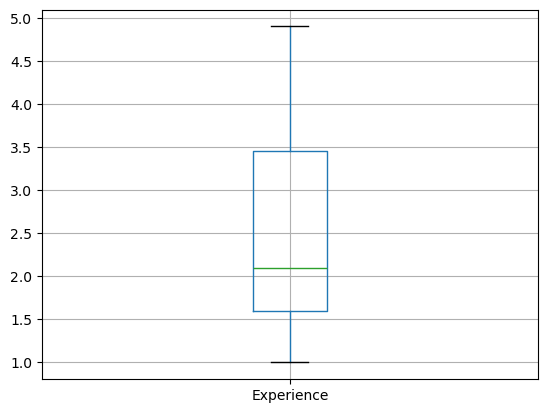

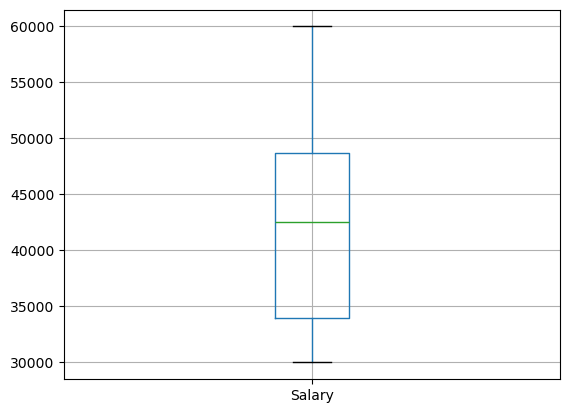

In [ ]:
#Assumption 1: There should be no outliers in the data.
#Check using boxplot.
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

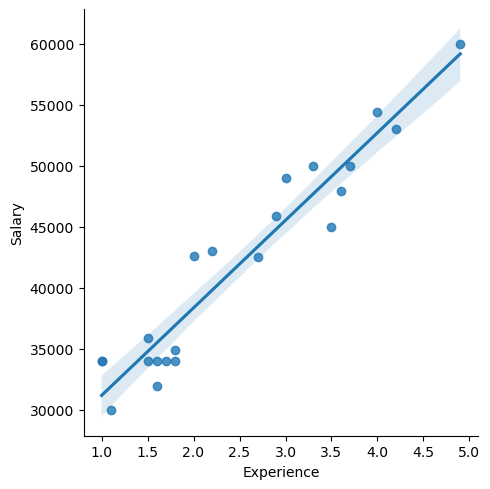

In [ ]:
#Assumption 2:Assumption of Linearity:Every ind var should have a
#linear relationship with the dep var.

sns.lmplot(data=data,x='Experience',y='Salary')
plt.show();

### Step 4: Data Splitting

In [ ]:
x= data.iloc[:,:-1].values
y= data.iloc[:, -1].values

In [ ]:
y

array([34000, 35900, 34000, 42579, 33990, 34000, 43000, 42500, 30000,
       45900, 34900, 32000, 34000, 34000, 49000, 50000, 49990, 54390,
       53000, 45000, 47900, 60000], dtype=int64)

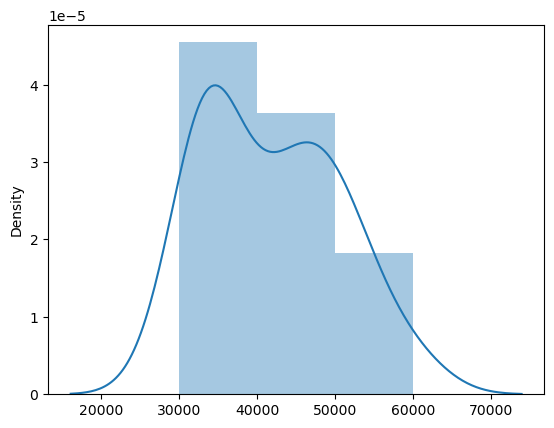

In [ ]:
#Assumption of Normality: The dependent variable should follow an
#approximate normal distribution
sns.distplot(y)
plt.show()

In [ ]:
"""
# Log transformation
import numpy as np
y_log  = np.log(y)
"""

'\n# Log transformation\nimport numpy as np\ny_log  = np.log(y)\n'

In [ ]:
#sns.distplot(y_log)
#plt.show()

In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3 , random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14, 1)
(8, 1)
(14,)
(8,)


In [ ]:
#Fitting the Simple Linear Regression model to the training dataset
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(x_train,y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

24892.03664235489
[7077.8263528]


In [ ]:
#Prediction of Test and Training set result
y_pred= lm.predict(x_test)
x_pred= lm.predict(x_train)

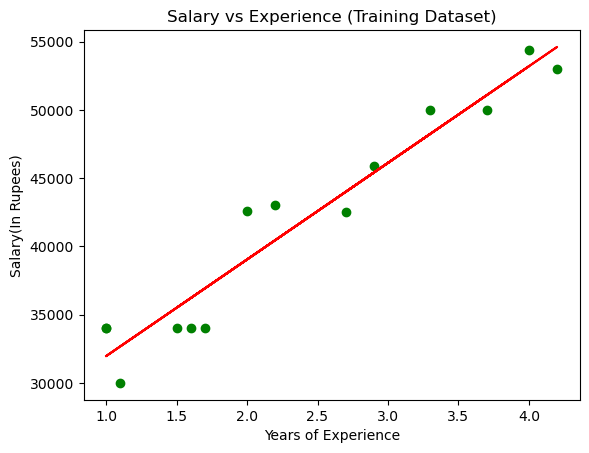

In [ ]:
plt.scatter(x_train, y_train, color="green")
plt.plot(x_train, x_pred, color="red")
plt.title("Salary vs Experience (Training Dataset)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary(In Rupees)")
plt.show()

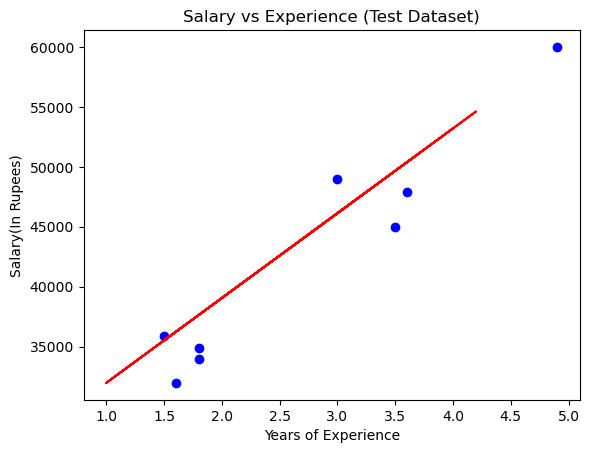

In [ ]:
#visualizing the Test set results
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_train, x_pred, color="red")
plt.title("Salary vs Experience (Test Dataset)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary(In Rupees)")
plt.show()

In [ ]:
import pandas as pd

# Creating a DataFrame with x_test, y_test, and y_pred
results_df = pd.DataFrame({'Experience': x_test.squeeze(), 'Actual Salary': y_test, 'Predicted Salary': y_pred})
results_df

,Experience,Actual Salary,Predicted Salary
0,3.6,47900,50372.211512
1,1.8,34900,37632.124077
2,3.0,49000,46125.515701
3,1.8,34000,37632.124077
4,1.5,35900,35508.776172
5,4.9,60000,59573.385771
6,1.6,32000,36216.558807
7,3.5,45000,49664.428877


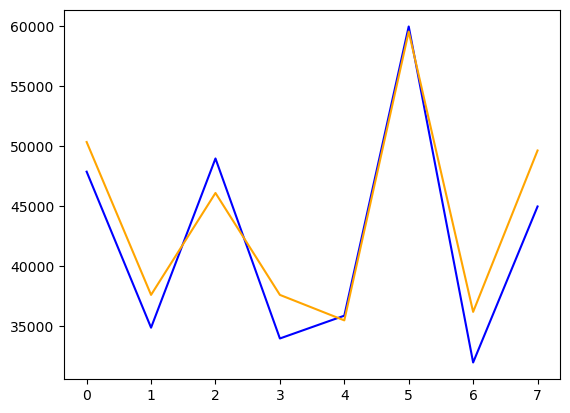

In [ ]:
results_df["Actual Salary"].plot(color="blue")
results_df["Predicted Salary"].plot(color="orange")
plt.show()

In [ ]:
results_df["Residual"]=results_df["Actual Salary"]-results_df["Predicted Salary"]
results_df

,Experience,Actual Salary,Predicted Salary,Residual
0,3.6,47900,50372.211512,-2472.211512
1,1.8,34900,37632.124077,-2732.124077
2,3.0,49000,46125.515701,2874.484299
3,1.8,34000,37632.124077,-3632.124077
4,1.5,35900,35508.776172,391.223828
5,4.9,60000,59573.385771,426.614229
6,1.6,32000,36216.558807,-4216.558807
7,3.5,45000,49664.428877,-4664.428877


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

## Conclusion:

Based on the complete analysis, the Simple Linear Regression model demonstrates a clear and positive relationship between **Years of Experience** and **Salary**. As experience increases, salary shows a consistent upward trend, confirming experience as a strong predictor of compensation.

The comparison between **Actual Salary** and **Predicted Salary** indicates that the model’s predictions are reasonably close to real values across most observations. While minor deviations exist, these are expected in real-world data and are reflected in the residual values.

Residual analysis shows both positive and negative errors, with values distributed around zero. This indicates that the model does not systematically overestimate or underestimate salaries, and the assumption of linearity is largely satisfied.

The **R-squared score** further confirms that a significant portion of salary variation is explained by experience alone, making the model effective for basic predictive and explanatory purposes.

Overall, this Simple Linear Regression model is suitable for entry-level salary prediction and analytical understanding. For higher accuracy, future improvements may include adding more explanatory variables such as education level, job role, or industry.
